<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/relu2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [585]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

In [586]:
x=np.linspace(-2.0, 2.0, num=200)
x= x[:, np.newaxis]
x.shape

(200, 1)

In [587]:
y = np.sin(x)
y.shape

(200, 1)

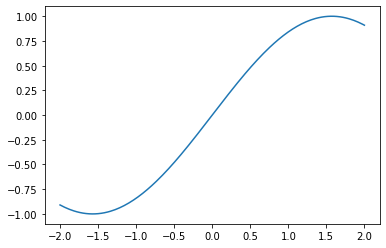

In [588]:
plt.plot(x,y)

In [589]:
X_train = torch.from_numpy(x.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32))

In [590]:
# hyper parameters
input_size = 1 
hidden_size1 = 30
hidden_size2 = 10
num_class = 1


In [591]:
def relu2(x,b):
  a = torch.maximum(torch.tensor([0]),x)
  return a*(a<b)

In [592]:
a=torch.tensor([[1,-2,3],[4,5,6]])
relu2(a,4)

tensor([[1, 0, 3],
        [0, 0, 0]])

In [593]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size1,hidden_size2,num_class):
    super().__init__()
    self.linear1 = nn.Linear(input_size,hidden_size1)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size1,hidden_size2)
    self.linear3 = nn.Linear(hidden_size2,num_class)
  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    #out = relu2(out,1)
    out = self.linear2(out)
    out = self.relu(out)
    #out = relu2(out,2)
    y_pred = self.linear3(out)
    return y_pred

In [594]:
model = NeuralNet(input_size=input_size,hidden_size1=hidden_size1,hidden_size2=hidden_size2,num_class=num_class)

In [595]:
learning_rate = 0.05
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [596]:
n_epochs = 500

for epoch in range(n_epochs):

  #forward pass
  y_pred = model(X_train)

  #loss
  loss = criterion(y_pred,y_train)

  #backward pass
  loss.backward()

  #gradient update
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0 :
    print(f'epoch = {epoch+1} , loss = {loss.item():.4f} ')



epoch = 10 , loss = 0.0298 
epoch = 20 , loss = 0.0098 
epoch = 30 , loss = 0.0089 
epoch = 40 , loss = 0.0083 
epoch = 50 , loss = 0.0077 
epoch = 60 , loss = 0.0072 
epoch = 70 , loss = 0.0066 
epoch = 80 , loss = 0.0061 
epoch = 90 , loss = 0.0055 
epoch = 100 , loss = 0.0052 
epoch = 110 , loss = 0.0049 
epoch = 120 , loss = 0.0047 
epoch = 130 , loss = 0.0045 
epoch = 140 , loss = 0.0043 
epoch = 150 , loss = 0.0041 
epoch = 160 , loss = 0.0040 
epoch = 170 , loss = 0.0038 
epoch = 180 , loss = 0.0037 
epoch = 190 , loss = 0.0036 
epoch = 200 , loss = 0.0034 
epoch = 210 , loss = 0.0033 
epoch = 220 , loss = 0.0032 
epoch = 230 , loss = 0.0031 
epoch = 240 , loss = 0.0030 
epoch = 250 , loss = 0.0029 
epoch = 260 , loss = 0.0028 
epoch = 270 , loss = 0.0028 
epoch = 280 , loss = 0.0027 
epoch = 290 , loss = 0.0026 
epoch = 300 , loss = 0.0025 
epoch = 310 , loss = 0.0025 
epoch = 320 , loss = 0.0024 
epoch = 330 , loss = 0.0023 
epoch = 340 , loss = 0.0023 
epoch = 350 , loss = 0.

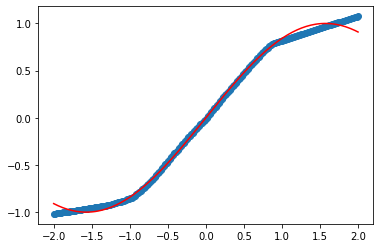

In [597]:
plt.scatter(X_train.detach().numpy(),model(X_train).detach().numpy())
plt.plot(x,y,c='r')